In [109]:
from google.colab import files
uploaded = files.upload()


Saving dog.jpg to dog (11).jpg


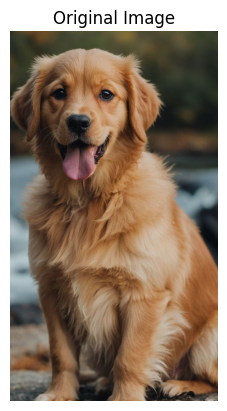

In [110]:
from PIL import Image
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[-1]
image = Image.open(filename)

plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


Enter number of intensity levels (must be a power of 2 like 2, 4, 8, 16, ..., 256): 2


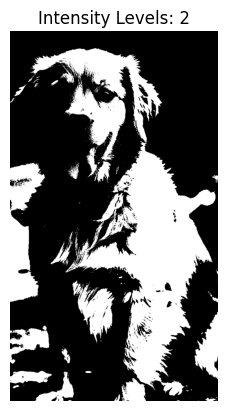

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_intensity_levels(image, levels):
    factor = 256 // levels
    reduced_image = (image // factor) * factor
    return reduced_image

# Load image (use the image you uploaded earlier)
img_path = list(uploaded.keys())[0]
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Ask user to enter levels
while True:
    try:
        levels = int(input("Enter number of intensity levels (must be a power of 2 like 2, 4, 8, 16, ..., 256): "))
        if levels in [2, 4, 8, 16, 32, 64, 128, 256]:
            break
        else:
            print("Please enter a valid power of 2 between 2 and 256.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

# Apply intensity reduction
reduced_img = reduce_intensity_levels(gray_img, levels)

# Save and show
cv2.imwrite(f'reduced_levels_{levels}.png', reduced_img)

plt.imshow(reduced_img, cmap='gray')
plt.title(f'Intensity Levels: {levels}')
plt.axis('off')
plt.show()


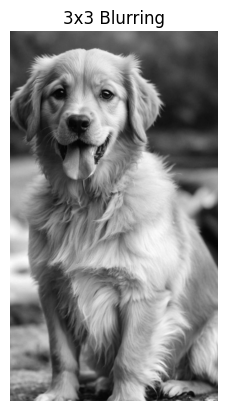

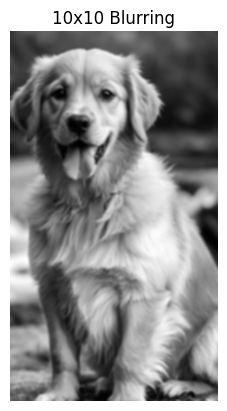

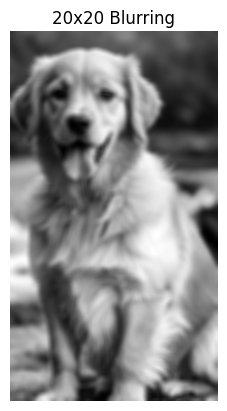

In [112]:
def spatial_averaging(image, kernels=[3, 10, 20]):
    for k in kernels:
        blurred = cv2.blur(image, (k, k))
        cv2.imwrite(f'blurred_{k}x{k}.png', blurred)
        plt.imshow(blurred, cmap='gray')
        plt.title(f'{k}x{k} Blurring')
        plt.axis('off')
        plt.show()

spatial_averaging(gray_img)


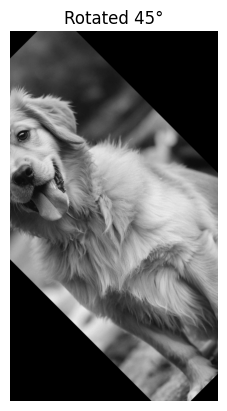

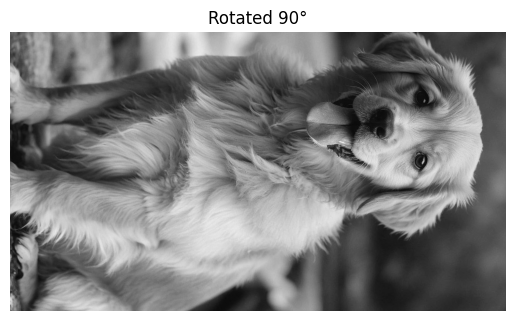

In [113]:
def rotate_image(image):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    rot45 = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated_45 = cv2.warpAffine(image, rot45, (w, h))

    rotated_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    cv2.imwrite("rotated_45.png", rotated_45)
    cv2.imwrite("rotated_90.png", rotated_90)

    # Show
    plt.imshow(rotated_45, cmap='gray')
    plt.title("Rotated 45°")
    plt.axis("off")
    plt.show()

    plt.imshow(rotated_90, cmap='gray')
    plt.title("Rotated 90°")
    plt.axis("off")
    plt.show()

rotate_image(gray_img)


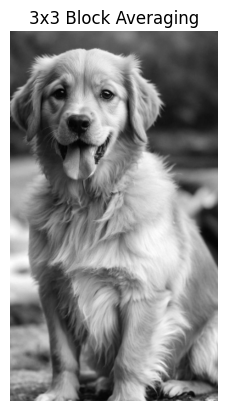

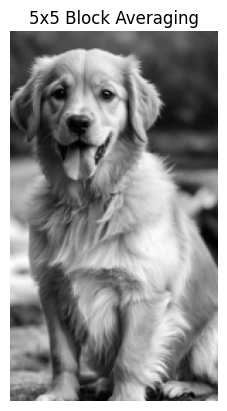

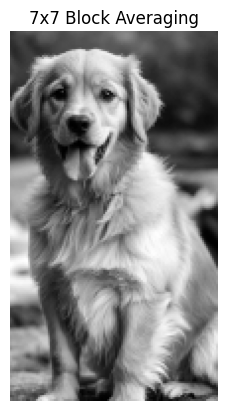

In [114]:
def block_averaging(image, block_size):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    h, w = image.shape
    h_trim = h - (h % block_size)
    w_trim = w - (w % block_size)
    trimmed = image[:h_trim, :w_trim]

    reshaped = trimmed.reshape(h_trim // block_size, block_size, w_trim // block_size, block_size)
    block_means = reshaped.mean(axis=(1, 3)).astype(np.uint8)
    upsampled = cv2.resize(block_means, (w, h), interpolation=cv2.INTER_NEAREST)

    return upsampled

for size in [3, 5, 7]:
    reduced = block_averaging(gray_img, size)
    cv2.imwrite(f'block_avg_{size}x{size}.png', reduced)

    plt.imshow(reduced, cmap='gray')
    plt.title(f'{size}x{size} Block Averaging')
    plt.axis('off')
    plt.show()
